In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
hitters_path = "../../Data/Hitters.csv"
hitters = pd.read_csv(hitters_path)
hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [3]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [4]:
hitters = hitters.dropna(subset=["Salary"])
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  263 non-null    object 
 1   AtBat       263 non-null    int64  
 2   Hits        263 non-null    int64  
 3   HmRun       263 non-null    int64  
 4   Runs        263 non-null    int64  
 5   RBI         263 non-null    int64  
 6   Walks       263 non-null    int64  
 7   Years       263 non-null    int64  
 8   CAtBat      263 non-null    int64  
 9   CHits       263 non-null    int64  
 10  CHmRun      263 non-null    int64  
 11  CRuns       263 non-null    int64  
 12  CRBI        263 non-null    int64  
 13  CWalks      263 non-null    int64  
 14  League      263 non-null    object 
 15  Division    263 non-null    object 
 16  PutOuts     263 non-null    int64  
 17  Assists     263 non-null    int64  
 18  Errors      263 non-null    int64  
 19  Salary      263 non-null    f

In [5]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_pipeline = Pipeline([("standardization",StandardScaler())])
numerical_attributes = hitters.drop(["Unnamed: 0","Salary","League","Division","NewLeague"],axis=1).columns

categorical_pipeline = Pipeline([("encoding",OneHotEncoder())])
categorical_attributes = ["League","Division","NewLeague"]

transformer = ColumnTransformer([("numerical_pipeline",numerical_pipeline,numerical_attributes),
                                 ("categorical_pipeline",categorical_pipeline,categorical_attributes)])

X = pd.DataFrame(transformer.fit_transform(hitters))
Y = hitters["Salary"]

### Principal Components Regression

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
X_reduced = pca.fit_transform(X)
pd.DataFrame(X_reduced).head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.072283,1.732376,0.328880,1.751364,0.693230,-0.131539,-0.143026,0.606139,-0.247517,-0.639132,...,-0.070130,0.384550,0.046210,0.144670,0.079934,0.038115,-0.019255,1.895463e-17,1.023170e-17,-1.093414e-17
1,0.365637,-2.369228,-0.755543,0.890310,1.522542,0.719740,-1.304556,0.610437,-0.379983,0.015134,...,0.023154,-0.012710,0.060730,0.161193,0.044305,0.014840,-0.003397,-8.402467e-17,1.527242e-16,-3.047158e-17
2,3.517675,0.708172,-0.786675,0.356616,-0.929352,-1.299967,0.963758,-0.598498,0.210802,0.770556,...,0.105951,-0.352116,0.246510,0.010186,-0.218089,0.037825,-0.066489,9.433499e-17,-4.380320e-17,1.025089e-16
3,-2.519003,-0.302286,-1.041685,2.109359,0.569245,0.005304,0.290867,-0.758663,0.418386,0.139291,...,0.013497,0.033772,0.041165,0.053054,-0.044256,0.010365,-0.013582,1.083533e-16,1.974472e-16,2.512199e-16
4,0.990764,-1.537026,3.343111,-1.093936,1.047851,0.461804,0.876344,0.758490,-0.668063,-0.219328,...,0.026310,-0.085913,0.044329,0.012142,-0.050695,0.126035,-0.071029,6.402716e-17,1.893521e-16,2.873271e-17


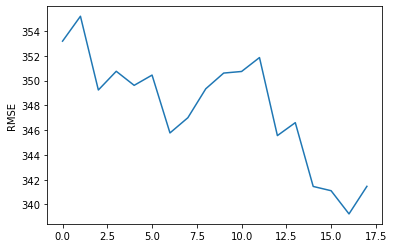

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

RMSE = []
lr = LinearRegression()
for i in range(2, 20):
    scores = cross_val_score(lr,X_reduced[:,:i],Y,scoring="neg_mean_squared_error",cv=10)    
    RMSE.append(np.sqrt(-1*scores.mean()))

plt.plot(RMSE)
plt.ylabel("RMSE")
plt.show()

### Partial Least Squares

In [8]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression()
scores = cross_val_score(pls,X,Y,scoring="neg_mean_squared_error",cv=10)    
RMSE = np.sqrt(-1*scores)

print(RMSE.mean())

335.46939499281734
